In [6]:
from torchvision import datasets
dataset = datasets.MNIST(root='.', train=True, download=True)
data = dataset.data
targets = dataset.targets
print("dataset.shape")
print(data.shape)
print("targets.shape")
print(targets.shape)

dataset.shape
torch.Size([60000, 28, 28])
targets.shape
torch.Size([60000])


Text(0.5, 1.0, 'Label: 5')

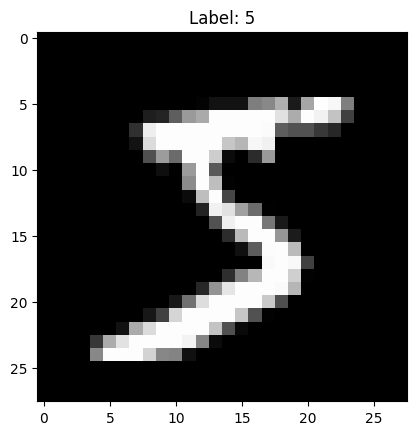

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0], cmap='gray')
plt.title(f"Label: {targets[0].item()}")

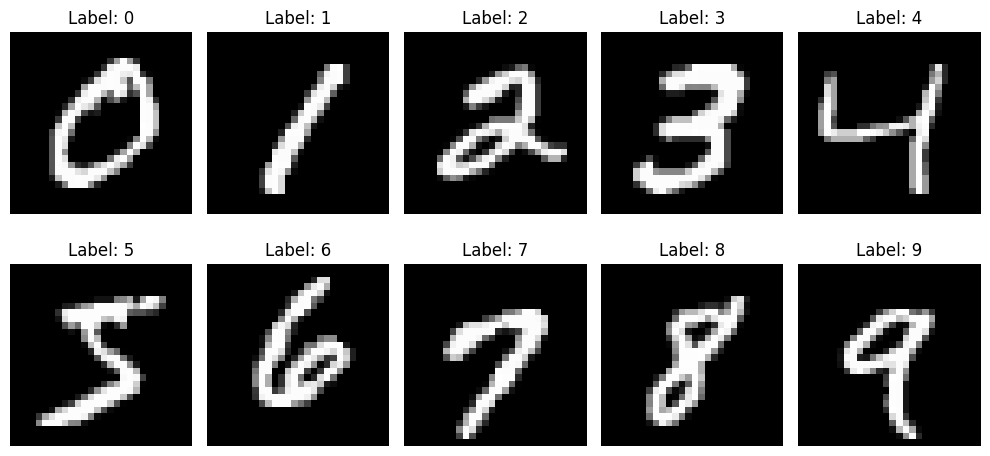

In [8]:
import torch
# target が 0 から 9 までの各数字を1つずつ含むようにサンプリング
indices = [torch.where(targets == d)[0][0].item() for d in range(10)]
idx_tensor = torch.tensor(indices, dtype=torch.long)
samples = data[idx_tensor]
labels = targets[idx_tensor]
# 2行5列でプロット
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, lbl in zip(axes.flatten(), samples, labels):
    ax.imshow(img.numpy(), cmap='gray')
    ax.set_title(f"Label: {int(lbl)}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.linear1 = nn.Linear(28*28, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        # (N, 28, 28) -> (N, 784)
        x = x.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [58]:
model = SimpleMLP()

In [59]:
sample = data[0]
sample = sample.unsqueeze(0)
sample = sample.float() / 255.0

In [60]:
logits = model(sample)
probs = F.softmax(logits, dim=1)

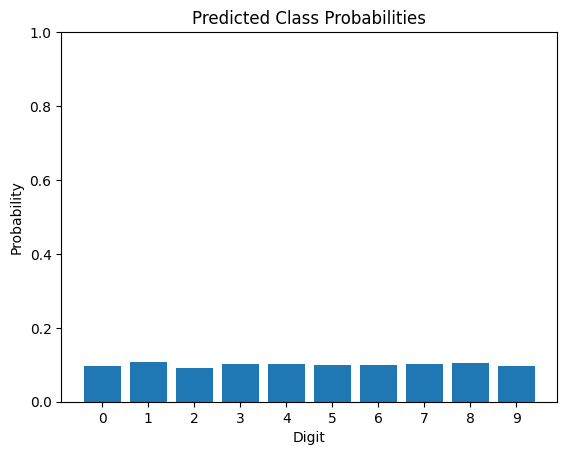

In [61]:
probs_np = probs.detach().numpy().flatten()
plt.bar(range(10), probs_np)
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Predicted Class Probabilities')
plt.xticks(range(10))
plt.ylim(0, 1)
plt.show()

In [ ]:
predicted_class = torch.argmax(probs, dim=1).item()
print(f"Predicted class: {predicted_class}")

In [63]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
logits = model(sample)
label = targets[0].unsqueeze(0).long()
loss = criterion(logits, label)
print(f"Loss: {loss.item()}")

Loss: 2.3117594718933105


In [65]:
logits_ = torch.tensor([0, 0, 0, 0, 0, 1000.0, 0, 0, 0, 0]).unsqueeze(0)
loss_ = criterion(logits_, label)
probs_ = F.softmax(logits_, dim=1)
print(probs_)
print(f"loss (correct answer): {loss_.item()}")

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])
loss (correct answer): 0.0


In [66]:
optimizer.zero_grad()
logits = model(sample)
loss = criterion(logits, label)
loss.backward()
optimizer.step()

In [67]:
logits = model(sample)
loss = criterion(logits, label)
print(f"Loss: {loss.item()}")

Loss: 2.0255515575408936


In [68]:
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
batch_size = 64
num_epochs = 5
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='.', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [69]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)
    epoch_loss = total_loss / len(train_dataset)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 938/938 [00:11<00:00, 79.03it/s] 


Epoch 1, Loss: 0.2965


Epoch 2/5: 100%|██████████| 938/938 [00:16<00:00, 57.26it/s]


Epoch 2, Loss: 0.1350


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 65.52it/s]


Epoch 3, Loss: 0.1002


Epoch 4/5: 100%|██████████| 938/938 [00:13<00:00, 70.51it/s]


Epoch 4, Loss: 0.0813


Epoch 5/5: 100%|██████████| 938/938 [00:13<00:00, 70.96it/s]

Epoch 5, Loss: 0.0684


In [70]:
logits = model(sample)
probs = F.softmax(logits, dim=1)

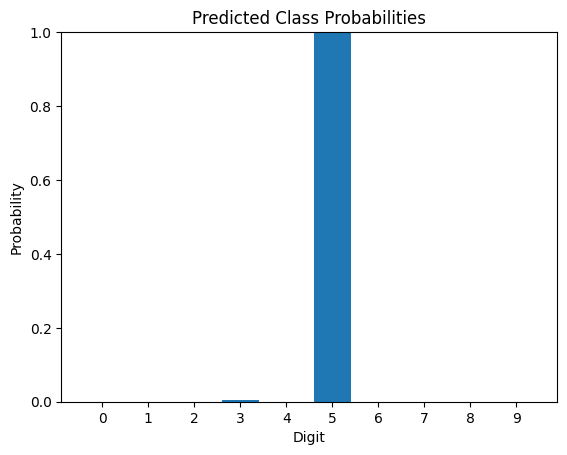

In [71]:
probs_np = probs.detach().numpy().flatten()
plt.bar(range(10), probs_np)
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Predicted Class Probabilities')
plt.xticks(range(10))
plt.ylim(0, 1)
plt.show()

In [72]:
predicted_class = torch.argmax(probs, dim=1).item()
print(f"Predicted class: {predicted_class}")

Predicted class: 5


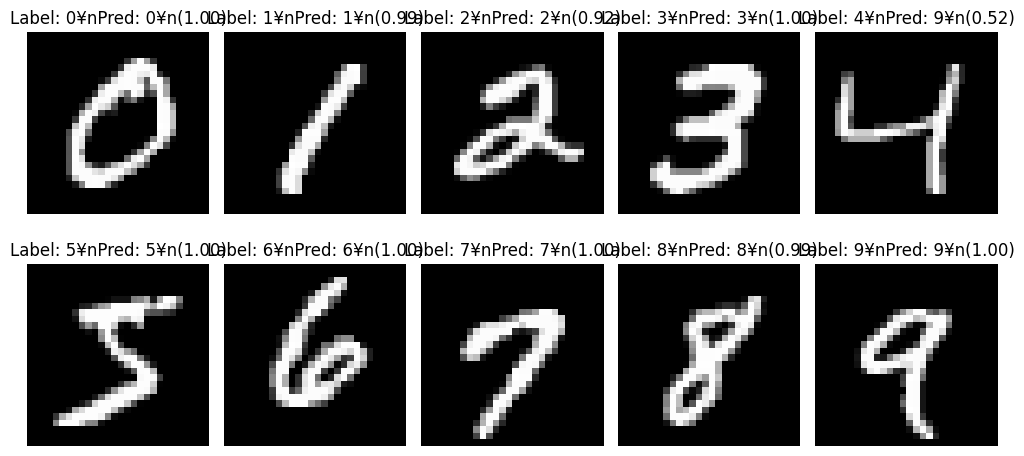

In [73]:
samples = data[idx_tensor]
labels = targets[idx_tensor]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, lbl in zip(axes.flatten(), samples, labels):
    logits = model(img.unsqueeze(0).float() / 255.0)
    probs = F.softmax(logits, dim=1)
    predicted_class = torch.argmax(probs, dim=1).item()
    prob = probs[0, predicted_class].item()
    ax.imshow(img.numpy(), cmap='gray')
    ax.set_title(f"Label: {int(lbl)}¥nPred: {predicted_class}¥n({prob:.2f})")
    ax.axis('off')


plt.tight_layout()
plt.show()

In [74]:
test_dataset = datasets.MNIST(root='.', train=False, transform=transform,
                              download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct / total:.2f}%')

Accuracy on test set: 97.28%


In [75]:
class SimpleMLP2(nn.Module):
    def __init__(self):
        super(SimpleMLP2, self).__init__()

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class SimpleMLP2(nn.Module):
    def __init__(self):
        super(SimpleMLP2, self).__init__()
        self.linear1 = nn.Linear(28*28, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [77]:
model = SimpleMLP2()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [78]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * images.size(0)
    epoch_loss = total_loss / len(train_dataset)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1/5: 100%|██████████| 938/938 [00:07<00:00, 125.43it/s]


Epoch 1, Loss: 0.5368


Epoch 2/5: 100%|██████████| 938/938 [00:07<00:00, 121.69it/s]


Epoch 2, Loss: 0.2867


Epoch 3/5: 100%|██████████| 938/938 [00:07<00:00, 127.51it/s]


Epoch 3, Loss: 0.2392


Epoch 4/5: 100%|██████████| 938/938 [00:07<00:00, 128.13it/s]


Epoch 4, Loss: 0.2081


Epoch 5/5: 100%|██████████| 938/938 [00:07<00:00, 127.01it/s]

Epoch 5, Loss: 0.1881


In [79]:
logits = model(sample)
probs = F.softmax(logits, dim=1)

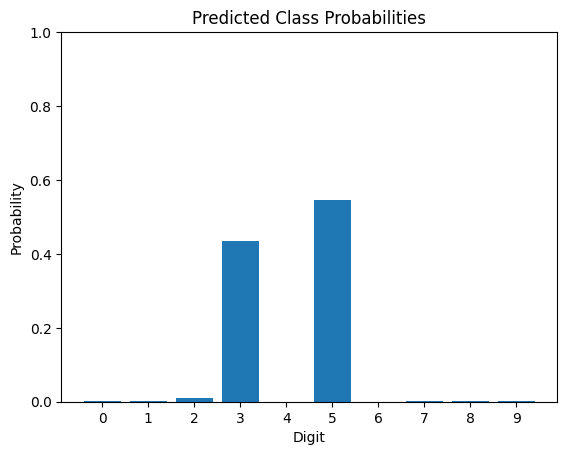

In [80]:
probs_np = probs.detach().numpy().flatten()
plt.bar(range(10), probs_np)
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Predicted Class Probabilities')
plt.xticks(range(10))
plt.ylim(0, 1)
plt.show()

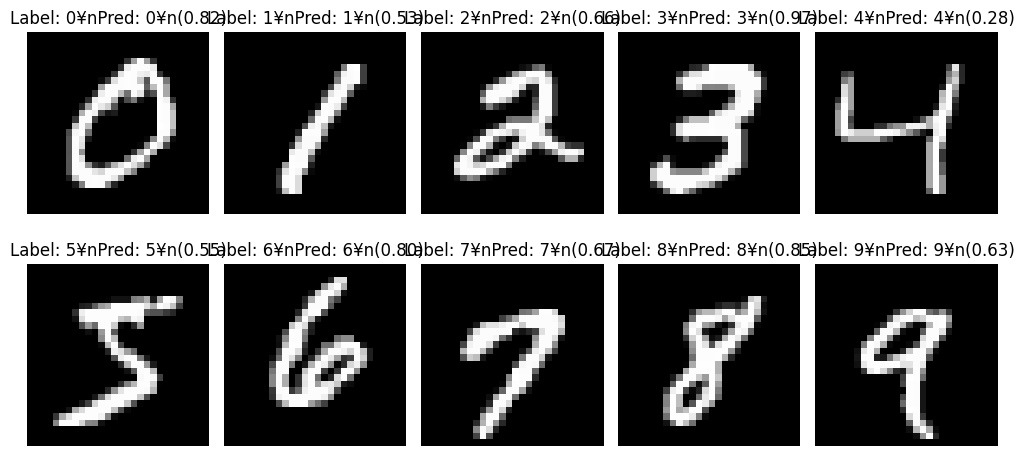

In [83]:
samples = data[idx_tensor]
labels = targets[idx_tensor]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, lbl in zip(axes.flatten(), samples, labels):
    logits = model(img.unsqueeze(0).float() / 255.0)
    probs = F.softmax(logits, dim=1)
    predicted_class = torch.argmax(probs, dim=1).item()
    prob = probs[0, predicted_class].item()
    ax.imshow(img.numpy(), cmap='gray')
    ax.set_title(f"Label: {int(lbl)}¥nPred: {predicted_class}¥n({prob:.2f})")
    ax.axis('off')


plt.tight_layout()
plt.show()

In [9]:
test_dataset = datasets.MNIST(root='.', train=False, transform=transform,
                              download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on test set: {100 * correct / total:.2f}%')

NameError: name 'transform' is not defined